## Time Series Prediction with LSTM Recurrent Neural Networks

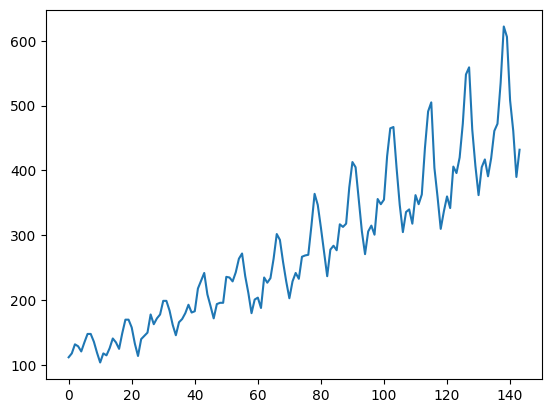

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [21]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [22]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [23]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [24]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [26]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [28]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [29]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/100


2023-04-19 10:17:08.170423: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 - 2s - loss: 6.0184e-04 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 5.2483e-04 - 41ms/epoch - 41ms/step
Epoch 3/100
1/1 - 0s - loss: 4.5315e-04 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 3.8692e-04 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 3.2621e-04 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 2.7106e-04 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 2.2148e-04 - 5ms/epoch - 5ms/step
Epoch 8/100
1/1 - 0s - loss: 1.7745e-04 - 10ms/epoch - 10ms/step
Epoch 9/100
1/1 - 0s - loss: 1.3889e-04 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 1.0567e-04 - 6ms/epoch - 6ms/step
Epoch 11/100
1/1 - 0s - loss: 7.7636e-05 - 5ms/epoch - 5ms/step
Epoch 12/100
1/1 - 0s - loss: 5.4545e-05 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 3.6115e-05 - 9ms/epoch - 9ms/step
Epoch 14/100
1/1 - 0s - loss: 2.1999e-05 - 10ms/epoch - 10ms/step
Epoch 15/100
1/1 - 0s - loss: 1.1800e-05 - 11ms/epoch - 11ms/step
Epoch 16/100
1/1 - 0s - loss: 5.0678e-06 - 6ms/epoch - 

In [30]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 11ms/step
Train Score: 0.05 RMSE
Test Score: 145.38 RMSE


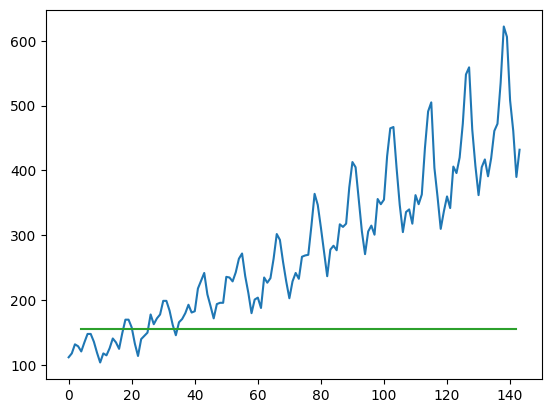

In [31]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Epoch 1/100
1/1 - 0s - loss: 8.5620e-04 - 422ms/epoch - 422ms/step
Epoch 2/100
1/1 - 0s - loss: 7.6884e-04 - 6ms/epoch - 6ms/step
Epoch 3/100
1/1 - 0s - loss: 6.8642e-04 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 6.0899e-04 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 5.3659e-04 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 4.6924e-04 - 8ms/epoch - 8ms/step
Epoch 7/100
1/1 - 0s - loss: 4.0691e-04 - 5ms/epoch - 5ms/step
Epoch 8/100
1/1 - 0s - loss: 3.4958e-04 - 5ms/epoch - 5ms/step
Epoch 9/100
1/1 - 0s - loss: 2.9719e-04 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 2.4968e-04 - 5ms/epoch - 5ms/step
Epoch 11/100
1/1 - 0s - loss: 2.0695e-04 - 6ms/epoch - 6ms/step
Epoch 12/100
1/1 - 0s - loss: 1.6890e-04 - 5ms/epoch - 5ms/step
Epoch 13/100
1/1 - 0s - loss: 1.3539e-04 - 5ms/epoch - 5ms/step
Epoch 14/100
1/1 - 0s - loss: 1.0626e-04 - 5ms/epoch - 5ms/step
Epoch 15/100
1/1 - 0s - loss: 8.1308e-05 - 6ms/epoch - 6ms/step
Epoch 16/100
1/1 - 0s - loss: 6.0321e-05 - 5m

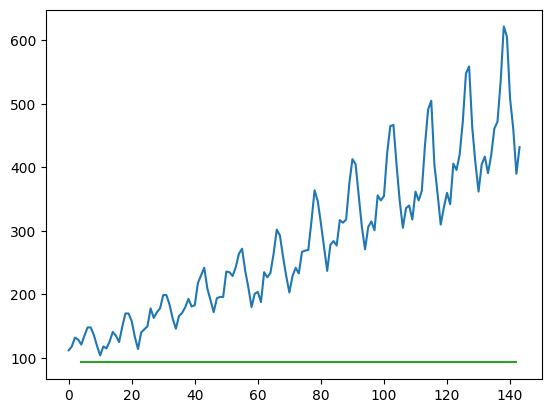

In [33]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/100
1/1 - 1s - loss: 0.0018 - 717ms/epoch - 717ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0017 - 6ms/epoch - 6ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0015 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0014 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0013 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0012 - 7ms/epoch - 7ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0011 - 5ms/epoch - 5ms/step
Epoch 8/100
1/1 - 0s - loss: 9.8332e-04 - 6ms/epoch - 6ms/step
Epoch 9/100
1/1 - 0s - loss: 8.8728e-04 - 6ms/epoch - 6ms/step
Epoch 10/100
1/1 - 0s - loss: 7.9676e-04 - 6ms/epoch - 6ms/step
Epoch 11/100
1/1 - 0s - loss: 7.1174e-04 - 7ms/epoch - 7ms/step
Epoch 12/100
1/1 - 0s - loss: 6.3223e-04 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 5.5817e-04 - 6ms/epoch - 6ms/step
Epoch 14/100
1/1 - 0s - loss: 4.8952e-04 - 7ms/epoch - 7ms/step
Epoch 15/100
1/1 - 0s - loss: 4.2622e-04 - 7ms/epoch - 7ms/step
Epoch 16/100
1/1 - 0s - loss: 3.6816e-04 - 7ms/epoch - 7ms/step
Epoch 17/

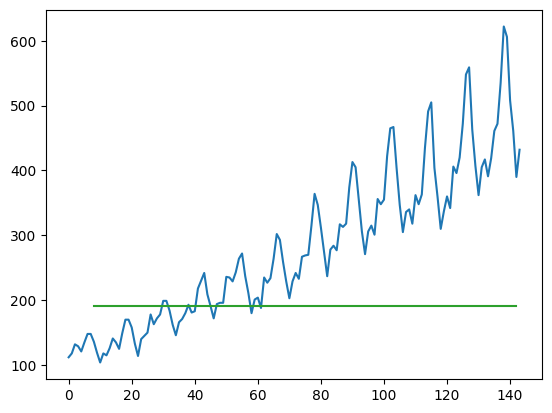

In [35]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()